In [5]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import time

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Input Data

In [6]:
#MOUSE

X_red = pd.read_csv("network_embeddings/mouse_explog_100.csv", header=None) ## change file name
nodes = pd.read_csv("data/mouse_nodes.csv", header=None) ## change file name

print (X_red.shape)
print (nodes.shape)

normalized = preprocessing.normalize(X_red) # Normalization

transform = TSNE  # PCA
trans = transform(n_components=2)
X2 = trans.fit_transform(normalized)

print (X2.shape)

(744, 32)
(744, 2)


/home/umair/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/umair/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(744, 2)


In [7]:
print (nodes.shape)

(744, 2)


D =  0.85
744 18 41.333333333333336
0.43283412628632373
165.77223548384225
0.8362532918561514


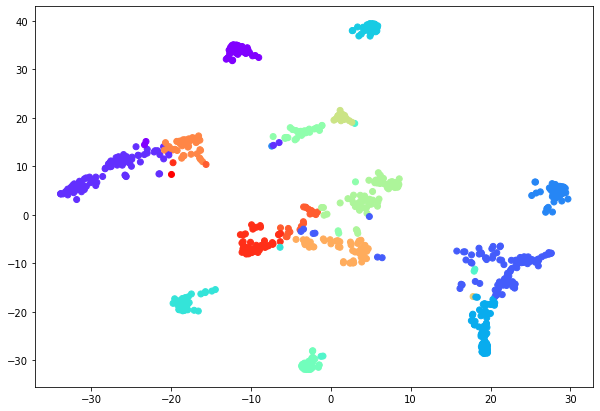

In [15]:
list_i = [85]
for i in range(len(list_i)):#len(list_i)
    j = list_i[i]/100.0
    print("D = ", j)
    clustering = AgglomerativeClustering(linkage='average',distance_threshold=j,n_clusters=None)
    X = clustering.fit(X_red)
    labels, counts = np.unique(X.labels_,return_counts=True)
    
    sum = 0
    for j in range(len(counts)):
        sum += counts[j]
    print (sum, len(counts),sum/len(counts))
    
    f = open("clusters/mouse_cluster_explog_18.txt"+str(list_i[i]),'w')  ## change file name

    count=0
    dt = 'explog' ## or 'only-exp'
    for i in labels:
        a = "cluster-"+str(i)+":"
        for j in range(len(X.labels_)):    
            if X.labels_[j] == i:
                if dt == 'only-exp':
                    if (len(a)<10+len(str(i))):
                        a = a + nodes[0] # + str(j)
                    else:
                        a = a + "," + nodes[0]
                else:
                    if (len(a)<10+len(str(i))):
                        a = a + nodes[1][j] # + str(j)
                    else:
                        a = a + "," + nodes[1][j]

        a = a + "\n"
        f.write(a)
    f.close()

    print (metrics.silhouette_score(X_red, X.labels_, metric='euclidean')) ## cluster separation (-1 -> 1) closed to 1 is better
    print (metrics.calinski_harabasz_score(X_red, X.labels_)) ## higher is better
    print (metrics.davies_bouldin_score(X_red, X.labels_)) # lower score is better

    plt.figure(figsize=(10, 7))
    plt.scatter(X2[:,0], X2[:,1], c=X.labels_, cmap='rainbow')

#     plt.title("Mouse (Exp-log-Data), GCNN is applied, and performed clustering")
#     plt.savefig("mouse_avglog.png")